# Intro to Deep Learning

### Run this code to download datasets

In [4]:
from torchvision import datasets
from sklearn import datasets as sk_datasets

In [5]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
diabetes = sk_datasets.load_diabetes()

# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
data = sk_datasets.load_iris()

# Load MNIST
train_set = datasets.MNIST(root='./data', train=True, download=True)
test_set  = datasets.MNIST(root='./data', train=False, download=True)

### Artificial Neural Networks

* Computing systems vaguely inspired by the biological neural networks that constitute animal brains.

<center><img src="img/brain-neural-network.png" width="700" /></center>

* Multilayer perceptron is a universal function approximator, as proven by the universal approximation theorem.

<center><img src="img/neural-net-extended.png" width="900" /></center>

### Artificial Neural Networks - Backpropagation

<center><img src="img/neural-network-backpropagation.png" width="800" /></center>

### Neuron. Looks like ...

<center><img src="img/neuron-linear-regression.png" width="500" /></center>

### Neuron. Looks like ... Linear Regression

<center><img src="img/neuron-linear-regression.png" width="500" /></center>

<center><img src="img/linear-regression-formula.png" width="300" /></center>

In [7]:
### PyTorch

<center><img src="img/pytorch-logo.jpeg" width="800" /></center>

SyntaxError: invalid syntax (<ipython-input-7-6100a27334c0>, line 3)

### What is PyTorch?

<center><img src="img/pytorch-logo.jpeg" width="400" /></center>

* open-source machine learning library written in Python, C++ and CUDA

* has NumPy-like interfaces

* provides two core features:
    * operations with tensors
    * automatic differentiation
    
    
* initialy developed at Facebook

https://pytorch.org

### What are tensors?

* Tensors are nothing but multidimensional arrays. 

<img src="img/tensor.jpeg" width="800">

### PyTorch Tensor operations - Vector

In [8]:
import torch

In [9]:
v = torch.tensor([3.5, 2.6, 7.1])

In [10]:
v

tensor([3.5000, 2.6000, 7.1000])

In [11]:
type(v)

torch.Tensor

In [12]:
v.shape

torch.Size([3])

### PyTorch Tensor operations - Matrix

In [13]:
m = torch.ones(3, 3)

In [14]:
m

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [15]:
m.shape

torch.Size([3, 3])

### Multiply matrix by vector

In [16]:
m = torch.rand(5, 5)

In [17]:
m

tensor([[0.2662, 0.7840, 0.3855, 0.5583, 0.5066],
        [0.7246, 0.9543, 0.5668, 0.8214, 0.1528],
        [0.7012, 0.5542, 0.2163, 0.1689, 0.3676],
        [0.4323, 0.7996, 0.3852, 0.2664, 0.1528],
        [0.9244, 0.5548, 0.2488, 0.4934, 0.2180]])

In [18]:
v = torch.rand(5, 1)

In [19]:
v

tensor([[0.7220],
        [0.6613],
        [0.2219],
        [0.6917],
        [0.6143]])

In [20]:
m * v

tensor([[0.1922, 0.5661, 0.2783, 0.4031, 0.3658],
        [0.4792, 0.6311, 0.3748, 0.5432, 0.1011],
        [0.1556, 0.1229, 0.0480, 0.0375, 0.0816],
        [0.2990, 0.5531, 0.2665, 0.1843, 0.1057],
        [0.5679, 0.3408, 0.1528, 0.3031, 0.1339]])

### Converting a PyTorch Tensor to a NumPy Array

In [21]:
a = torch.randn(10)

In [22]:
a

tensor([ 0.5172, -0.0525, -0.0860, -0.1659,  0.5251, -0.1029,  0.6691, -1.0542,
        -0.3302, -1.5430])

In [23]:
a.numpy()

array([ 0.51716316, -0.05248973, -0.08604019, -0.16589129,  0.52505577,
       -0.1029063 ,  0.66913676, -1.0542217 , -0.33019993, -1.5429901 ],
      dtype=float32)

### Converting NumPy Array to PyTorch Tensor

In [24]:
import numpy as np

In [25]:
a = np.ones(7)
a

array([1., 1., 1., 1., 1., 1., 1.])

In [26]:
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)

### autograd.Variable

<center><img src="img/autograd-variable.png" width="400" /></center>

* part of **autograd** module of PyTorch
* simply a wraper around **torch.Tensor**
* are used to build computational graph
* automatically accumulate gradient w.r.t. this variable (can be controlled using **requires_grad** parameter)

### autograd.Variable

In [28]:
from torch.autograd import Variable

In [29]:
x = Variable(torch.ones(2, 2), requires_grad=True)

In [30]:
y = x + 100

In [31]:
z = 2 * (y ** 2)

In [32]:
z

tensor([[20402., 20402.],
        [20402., 20402.]], grad_fn=<MulBackward>)

In [33]:
out = torch.mean(z)

In [34]:
out

tensor(20402., grad_fn=<MeanBackward1>)

In [35]:
# computes the sum of gradients of given tensors w.r.t. graph leaves
out.backward()

In [36]:
x.grad

tensor([[101., 101.],
        [101., 101.]])

### Simple autograd example - Regression

In [37]:
x = [1., 2., 3., 4., 5.]

In [38]:
y = [10., 20., 30., 40., 50.]

In [39]:
w = Variable(torch.tensor([1.]), requires_grad=True)

<center><img src="img/linear-regression-graph.png" width="600"></center>

In [40]:
for epoch in range(5):
    
    for x_i, y_i in zip(x, y):
        
        # compute predicted target variable
        y_pred = x_i * w
                
        # compute Mean Squared Error (MSE)
        loss = (y_pred - y_i) ** 2
        
        # compute gradients
        loss.backward()
        
        print('\t x={x_i}, y={y_i}, w.grad={w.grad[0]}'.format(**locals()))
        
        # make one step towards the local minima, with learning rate 0.01
        w.data -= 0.01 * w.grad.data
        
        # clear gradients after updating weights
        w.grad.data.zero_()
        
    print('Loss at epoch #%d: %.6f \n' % (epoch+1, loss.data[0]))

print('Final: w = %.4f' % w.data)

	 x=1.0, y=10.0, w.grad=-18.0
	 x=2.0, y=20.0, w.grad=-70.55999755859375
	 x=3.0, y=30.0, w.grad=-146.0592041015625
	 x=4.0, y=40.0, w.grad=-212.92185974121094
	 x=5.0, y=50.0, w.grad=-226.22947692871094
Loss at epoch #1: 511.797760 

	 x=1.0, y=10.0, w.grad=-4.524589538574219
	 x=2.0, y=20.0, w.grad=-17.73638916015625
	 x=3.0, y=30.0, w.grad=-36.71432876586914
	 x=4.0, y=40.0, w.grad=-53.521331787109375
	 x=5.0, y=50.0, w.grad=-56.866416931152344
Loss at epoch #2: 32.337894 

	 x=1.0, y=10.0, w.grad=-1.1373271942138672
	 x=2.0, y=20.0, w.grad=-4.458320617675781
	 x=3.0, y=30.0, w.grad=-9.228721618652344
	 x=4.0, y=40.0, w.grad=-13.45343017578125
	 x=5.0, y=50.0, w.grad=-14.294281005859375
Loss at epoch #3: 2.043265 

	 x=1.0, y=10.0, w.grad=-0.2858867645263672
	 x=2.0, y=20.0, w.grad=-1.1206741333007812
	 x=3.0, y=30.0, w.grad=-2.3197975158691406
	 x=4.0, y=40.0, w.grad=-3.381744384765625
	 x=5.0, y=50.0, w.grad=-3.5931015014648438
Loss at epoch #4: 0.129104 

	 x=1.0, y=10.0, w.grad=

### Linear Regression using PyTorch

The diabetes dataset consists of 10 physiological variables (age, sex,
weight, blood pressure) measure on 442 patients, and an indication of
disease progression after one year

* **Samples total** - 442
* **Dimensionality** - 10
* **Features** - real, -.2 < x < .2
* **Targets** - integer 25 - 346

##### Load dataset from scikit-learn

In [42]:
diabetes = sk_datasets.load_diabetes()

X = diabetes.data[:]
y = diabetes.target[:].reshape(-1,1)

### Define Neural Network class

In [44]:
from torch import nn

In [45]:
class LinearRegressionModel(nn.Module):
    """
    Define Linear Regression class
    """

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        self.linear = nn.Linear(input_dim, output_dim)  # neural network with 1 layer

    def forward(self, x):
        return self.linear(x)

In [46]:
model = LinearRegressionModel(10, 1)

In [47]:
# define loss functions - Mean Square Error (MSE)

criterion = nn.MSELoss() # (y_hat − y)^2

In [48]:
# define learning rate

lr = 0.5

# define parameter optimizer

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [49]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2051, -0.3131,  0.0053,  0.1127,  0.1622,  0.0708,  0.3011, -0.0027,
          -0.2753,  0.1955]], requires_grad=True), Parameter containing:
 tensor([-0.1929], requires_grad=True)]

### Main training loop

In [50]:
n_epochs = 1000

for epoch in range(n_epochs):
    
    # convert features and target into PyTorch Variable
    inputs = Variable(torch.from_numpy(X).float())
    targets = Variable(torch.from_numpy(y).float())

    # forward pass
    outputs = model.forward(inputs)

    # calculate loss (MSE)
    loss = criterion(outputs, targets)
    
    # compute gradients
    loss.backward()
    
    # perform one step in the oposite direction to the gradient (update weights)
    optimizer.step()
    
    # clear gradient values after weights are updated
    optimizer.zero_grad()
    
    if epoch % 100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 29134.333984375
epoch 100, loss 3934.77587890625
epoch 200, loss 3407.33544921875
epoch 300, loss 3194.235595703125
epoch 400, loss 3079.431884765625
epoch 500, loss 3009.878173828125
epoch 600, loss 2965.943603515625
epoch 700, loss 2937.672119140625
epoch 800, loss 2919.25439453125
epoch 900, loss 2907.125


### Measure the accuracy

In [51]:
# switch to evaluation mode

model = model.eval()

In [52]:
# predict target variable for the whole dataset

with torch.no_grad():
    y_pred = model.forward(Variable(torch.from_numpy(X).float()))
    y_pred = y_pred.data.numpy()

In [64]:
type(y_pred)

numpy.ndarray

In [65]:
from sklearn.metrics import r2_score

# calculate variance score
r2_score(y, y_pred)

0.5111118594593538

### Task - Logistic Regression 

In [68]:
data = sk_datasets.load_iris()

In [69]:
X = data.data[:]
y = data.target[:]

In [70]:
# define Neural Network class

class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        # << YOUR CODE HERE >>
    
    def forward(self, x):
        # << YOUR CODE HERE >>
        return # << YOUR CODE HERE >>

In [71]:
model = LogisticRegression(# << YOUR CODE HERE >>)

SyntaxError: unexpected EOF while parsing (<ipython-input-71-b2e3a518ffc2>, line 1)

In [72]:
# https://pytorch.org/docs/stable/optim.html

optimizer = # << YOUR CODE HERE >>

SyntaxError: invalid syntax (<ipython-input-72-2357f39f1d68>, line 3)

In [ ]:
# https://pytorch.org/docs/stable/nn.html

criterion = # << YOUR CODE HERE >>

In [ ]:
n_epochs = # << YOUR CODE HERE >>

for epoch in range(n_epochs):
    
    # convert features and target into PyTorch Variable
    inputs = Variable(torch.from_numpy(X).float())
    targets = Variable(torch.from_numpy(y))

    # forward pass
    outputs = # << YOUR CODE HERE >>
    
    # convert predicted probabilities to class labels
    _, predicted_labels = torch.max(outputs.data, 1)

    # calculate loss (Cross-Entropy)
    loss = # << YOUR CODE HERE >>
    
    # calculate number of correctly predicted data points
    corrects = torch.sum(predicted_labels == targets.data).item()
    
    # compute gradients
    # << YOUR CODE HERE >>
    
    # perform one step in the oposite direction to the gradient (update weights)
    # << YOUR CODE HERE >>
    
    # clear gradient values after weights are updated
    # << YOUR CODE HERE >>
    
    if epoch % 100 == 0:
        accuracy = corrects / len(X)
        print('epoch = {0}, loss = {1:.6f}, accuracy = {2:.3f}'.format(epoch, loss.item(), accuracy))

## CNN Intro

### How computer sees an image?

<center><img src="img/image_rgb.png" width="600" /></center>

### Let's say we want to build image classifier using Fully-Connected Neural Network

<center><img src="img/feed-forward-image-classification.png" width="900" /></center>

#### Main issues with FC networks for image classification:
* **huge** number of parameters to learn (more than 17M in previous example)
* **not invariant** to small transformations or distortions of the input image
* **overfitting** possibility

### Convolutional Neural Network

* were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex.

<center><img src="img/human-visual-cortex.png" width="600" /></center>

* individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field
* the receptive fields of different neurons partially overlap such that they cover the entire visual field.

#### Quick historical facts

* Work by Hubel and Wiesel in the 1950s and 1960s showed that cat and monkey visual cortexes contain neurons that individually respond to small regions of the **visual field**.

* Kunihiko Fukushima in the 1980s proposed the **neocognitron** - a hierarchical, multilayered artificial neural network used for handwritten character recognition. The neocognitron was inspired by the model proposed by Hubel & Wiesel.

#### Quick historical facts

* LeCun et in 1989, used back-propagation to learn the **convolution kernel** coefficients directly from images of hand-written numbers.

* In 1998 LeCun developed LeNet-5 - a pioneering 7-level convolutional network.

<center><img src="img/lecun.jpg" width="300" /></center>

* 2012 was the first year that Convolutional Neural Networks grew to prominence as **Alex Krizhevsky** used them to win that year's **ImageNet** competition.

### Convolutions

* **convolution operation**, is an element-wise product and sum between two matrices/vectors - **kernel** or **filter** and part of the **original input** or **image**.

#### 1D convolution
<center><img src="img/conv-1d.jpg" width="300" /></center>

#### 2D convolution
<center><img src="img/conv-before.png" width="400" /></center>

* The **convolution** of the **5x5 image** and the **3x3 kernel** can be computed as shown in the animation:

<center><img src="img/conv-after-dynamic.gif" width="400" /></center>

* We slide the **kernel** (orange matrix) over our **original image** (green) by 1 pixel (also called **stride**) and for every position and for every position, we compute element wise multiplication (between the two matrices) and add the multiplication outputs.
* The **3×3 kernel** observes only a part of the input image in each stride.
* **Kernel** acts as **feature detector** from the original input image.

### Convolution examples

<center><img src="img/conv-edge-detection.png" width="700" /></center>

### Convolution examples

<center><img src="img/conv-gaussian-blur.png" width="700" /></center>

### Convolution examples

<center><img src="img/conv-sharpen.png" width="700" /></center>

### Extracting two feature maps from the image

<center><img src="img/conv-animation.gif" width="600" /></center>

### Convolution: padding=0, stride=1

* Convolution operation over an **4x4 input image** using **3x3 kernel** results in **2x2 feature map**.

<center><img src="img/conv_no_padding_no_strides.gif" width="300" /></center>

### Convolution: padding=2, stride=1

* Convolution operation over an **5x5 input image** using **4x4 kernel** results in **6x6 feature map**.

<center><img src="img/conv_arbitrary_padding_no_strides.gif" width="300" /></center>

### Convolution characteristics

* **Depth**: Depth corresponds to the number of **kernels** we use for the convolution operation. It will determine how many **feature maps** will be produced by the convolution operation. You can think of these three feature maps as **stacked 2D matrices**.

* **Stride**: Stride is the number of pixels by which we slide our kernel over the input matrix. When the stride is 1 then we move the filters one pixel at a time. When the stride is 2, then the filters jump 2 pixels at a time as we slide them around. Having a **larger stride** will produce **smaller feature maps**.

* **Zero-padding**: Sometimes, it is convenient to **pad the input matrix with zeros around the border**, so that we can apply the filter to bordering elements of our input image matrix. A nice feature of zero padding is that it allows us to **control the size of the feature maps**.

### Adding Non-Linearity

* Just like in other Neural Networks we add an additional **non-linear transformations** after every **convolution** operation.

### ReLU

* The most commonly used **non-linear transformation** in convolutional neural networks is **ReLU** (Rectified Linear Unit).
* ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero.

<center><img src="img/relu-chart.png" width="800" /></center>

### ReLU visualization

<center><img src="img/relu.png" width="800" /></center>

* Other non-linear functions **(tanh, sigmoid)** can also be used instead of **ReLU**, but **ReLU** has been found to perform better in most cases.

### Pooling

* **Spatial Pooling**, also reffered to as **subsampling** or **downsampling** reduces the dimensionality of each feature map but retains the most important information.
* There are different types of spatial pooling:
    * average
    * max
    * sum
    * etc.

### Max pooling

<center><img src="img/max-pooling.png" width="600" /></center>

#### LeNet-5 architecture (1998)

<center><img src="img/lenet.png" width="900" /></center>

#### AlexNet architecture (2012)

<center><img src="img/alexnet.png" width="900" /></center>

### Apply filter to the image using convolutions

In [77]:
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms
from torch.autograd import Variable

In [78]:
img = Image.open('./img/cat.png').convert('LA').resize((256, 256))

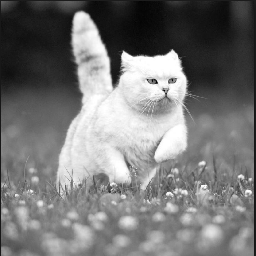

In [79]:
img

In [80]:
to_tensor = transforms.Compose([transforms.ToTensor()])
to_pil = transforms.Compose([transforms.ToPILImage()])

In [81]:
img_tensor = torch.unbind(to_tensor(img))
img_tensor = img_tensor[0].unsqueeze(0).unsqueeze(0)

In [82]:
kernel = np.array([
    [-1,  -1,  -1],
    [-1,  +8,  -1],
    [-1,  -1, -1]
])

In [83]:
conv1 = nn.Conv2d(1, 1, kernel_size=(3, 3), stride=1, padding=1, bias=False)
conv1.weight = nn.Parameter(torch.from_numpy(kernel).float().unsqueeze(0).unsqueeze(0))

In [84]:
img_edges = conv1(Variable(img_tensor)).data.view(1, 256, 256)

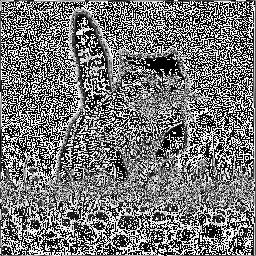

In [85]:
to_pil(img_edges)

### Let's build an image classifier

### Dataset - MNIST

* large database of handwritten digits
* contains 60,000 training images and 10,000 testing images
* contains digits from 0 to 9
* consit of images of size 28x28 pixel
* http://yann.lecun.com/exdb/mnist/

<center><img src="img/mnist.jpeg" width="600" /></center>

### Fully-connected Neural Network

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [89]:
from torchvision import datasets
import torchvision.transforms as transforms

In [90]:
transformations = transforms.Compose([transforms.ToTensor()])

In [91]:
train_set = datasets.MNIST(root='./data', train=True, transform=transformations, download=True)
test_set  = datasets.MNIST(root='./data', train=False, transform=transformations, download=True)

In [92]:
batch_size = 100

In [93]:
train_set_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=batch_size,
    shuffle=False
)

In [94]:
test_set_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=batch_size,
    shuffle=False
)

In [97]:
class FullyConnectedClassifier(nn.Module):
    
    def __init__(self, input_size, output_size):
    
        super(FullyConnectedClassifier, self).__init__()

        self.fc1 = nn.Linear(input_size, 512)      # 1st hidden layer - 512 neurons
        self.fc2 = nn.Linear(512, 256)             # 2nd hidden layer - 256 neurons
        self.fc3 = nn.Linear(256, output_size)     # output layer     - 10 classes
        
    def forward(self, x):

        # flatten 2D grayscale image to a vector of 784 elements
        x = x.view(-1, 28*28)
        
        # 1st hidden layer (fully-connected)
        x = self.fc1(x)
        
        # apply non-linear transformation - sigmoid
        x = torch.sigmoid(x)

        # 2nd hidden layer (fully-connected)        
        x = self.fc2(x)
        
        # apply non-linear transformation - sigmoid
        x = torch.sigmoid(x)

        # final output layer (fully-connected)
        x = self.fc3(x)

        # return final result
        return x

In [98]:
model = FullyConnectedClassifier(28*28, 10)

In [99]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [100]:
criterion = nn.CrossEntropyLoss()

In [101]:
n_epochs = 10

for epoch in range(1, n_epochs+1):

    # swith to train mode
    model = model.train()
    
    # global statistics
    running_train_loss = 0.
    
    for batch_idx, (inputs, targets) in enumerate(train_set_loader, start=1):

        # convert tensor to autograd.Variable
        inputs, targets = Variable(inputs), Variable(targets)

        # forward pass
        predictions = model.forward(inputs)

        # calculate loss - cross-entropy
        loss = criterion(predictions, targets)
        
        # accumulate loss
        running_train_loss += loss.item()

        # compute gradients
        loss.backward()
        
        # update weights based on calculated gradients
        optimizer.step()

        # clear all gradients after weights are updated
        optimizer.zero_grad()

    # print epoch statistics    
    epoch_train_loss = running_train_loss / len(train_set_loader.dataset)
    print('=> epoch: %d, train loss: %.6f' % (epoch, epoch_train_loss))
        
    # switch to evaluation/test mode
    model = model.eval()

    # global statistics
    running_test_loss = 0.
    running_test_corrects = 0.

    # disable calculation of gradients
    with torch.no_grad():

        for batch_idx, (inputs, targets) in enumerate(test_set_loader, start=1):

            # convert tensor to autograd.Variable
            inputs, targets = Variable(inputs), Variable(targets)
            
            # forward pass - make predictions
            predictions = model.forward(inputs)

            # calculate loss
            loss = criterion(predictions, targets)

            # convert probability to a predicted label
            _, prediction_labels = torch.max(predictions.data, 1)
            
            # calculate how many digits in the batch where predicted correctly
            running_test_corrects += torch.sum(prediction_labels == targets.data).item()

            # accumulate loss
            running_test_loss += loss.item()

    # print epoch statistics    
    epoch_test_loss = running_test_loss / len(test_set_loader.dataset)
    epoch_test_accuracy = running_test_corrects / len(test_set_loader.dataset)
    print('=> epoch: %d, test loss: %.6f, accuracy: %.3f \n' % (epoch, epoch_test_loss, epoch_test_accuracy))

=> epoch: 1, train loss: 0.022289
=> epoch: 1, test loss: 0.018840, accuracy: 0.445 

=> epoch: 2, train loss: 0.011348
=> epoch: 2, test loss: 0.007218, accuracy: 0.783 

=> epoch: 3, train loss: 0.005924
=> epoch: 3, test loss: 0.004932, accuracy: 0.850 

=> epoch: 4, train loss: 0.004538
=> epoch: 4, test loss: 0.004123, accuracy: 0.878 

=> epoch: 5, train loss: 0.003978
=> epoch: 5, test loss: 0.003742, accuracy: 0.889 

=> epoch: 6, train loss: 0.003691
=> epoch: 6, test loss: 0.003517, accuracy: 0.896 

=> epoch: 7, train loss: 0.003508
=> epoch: 7, test loss: 0.003357, accuracy: 0.902 

=> epoch: 8, train loss: 0.003366
=> epoch: 8, test loss: 0.003227, accuracy: 0.906 

=> epoch: 9, train loss: 0.003244
=> epoch: 9, test loss: 0.003112, accuracy: 0.909 

=> epoch: 10, train loss: 0.003132
=> epoch: 10, test loss: 0.003008, accuracy: 0.911 



In [110]:
train_set = datasets.CIFAR10(root='./data', train=True, transform=transformations, download=True)
test_set  = datasets.CIFAR10(root='./data', train=False, transform=transformations, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [103]:
train_set = datasets.MNIST(root='./data', train=True, transform=transformations, download=True)
test_set  = datasets.MNIST(root='./data', train=False, transform=transformations, download=True)

In [104]:
# number of images to process per batch

batch_size = 64

In [105]:
# load train set

train_set_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=batch_size,
    shuffle=False
)

In [106]:
# load test set

test_set_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=batch_size,
    shuffle=False
)

<center><img src="img/lenet.png"></center>

In [ ]:
class LeNet(nn.Module):
    
    """
    input - 3x32x32
    C1 - convolution 6@28x28 (5x5 kernel)
    ReLU activation
    S2 - max pooling 6@14x14 (2x2 kernel, stride 2)

    C3 - convolution 16@10x10 (5x5 kernel)
    ReLU activation
    S4 - max pooling 16@5x5 (2x2 kernel, stride 2)

    C5 - convolution 120@1x1 (5x5 kernel)
    
    F6 - fully-connected layear, 120 neurons
    F7 - fully-connected layear, 84 neurons
    ReLU activation
    
    F8 - 10 neurons (output)
    """
        
    def __init__(self):
        
        super(LeNet, self).__init__()
        # << YOUR CODE HERE >>

    def forward(self, x):
        # << YOUR CODE HERE >>
        
        return # << YOUR CODE HERE >>

In [108]:
model = LeNet()

NameError: name 'LeNet' is not defined

In [ ]:
optimizer = # << YOUR CODE HERE >>

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
n_epochs = 10

for epoch in range(1, n_epochs+1):

    # swith to train mode
    model = model.train()
    
    # global statistics
    running_train_loss = 0.
    
    for batch_idx, (inputs, targets) in enumerate(train_set_loader, start=1):

        # convert tensor to autograd.Variable
        inputs, targets = Variable(inputs), Variable(targets)

        # forward pass
        predictions = model.forward(inputs)

        # calculate loss - cross-entropy
        loss = # << YOUR CODE HERE >>
        
        # accumulate loss
        running_train_loss += loss.item()

        # compute gradients
        # << YOUR CODE HERE >>
        
        # update weights based on calculated gradients
        # << YOUR CODE HERE >>

        # clear all gradients after weights are updated
        # << YOUR CODE HERE >>

    # print epoch statistics    
    epoch_train_loss = running_train_loss / len(train_set_loader.dataset)
    print('=> epoch: %d, train loss: %.6f' % (epoch, epoch_train_loss))
        
    # switch to evaluation/test mode
    model = model.eval()

    # global statistics
    running_test_loss = 0.
    running_test_corrects = 0.

    # disable calculation of gradients
    with torch.no_grad():

        for batch_idx, (inputs, targets) in enumerate(test_set_loader, start=1):

            # convert tensor to autograd.Variable
            inputs, targets = Variable(inputs), Variable(targets)
            
            # forward pass - make predictions
            predictions = # << YOUR CODE HERE >>

            # calculate loss
            loss = # << YOUR CODE HERE >>

            # convert probability to a predicted label
            _, prediction_labels = torch.max(predictions.data, 1)
            
            # calculate how many digits in the batch where predicted correctly
            running_test_corrects += torch.sum(prediction_labels == targets.data).item()

            # accumulate loss
            running_test_loss += loss.item()

    # print epoch statistics    
    epoch_test_loss = running_test_loss / len(test_set_loader.dataset)
    epoch_test_accuracy = running_test_corrects / len(test_set_loader.dataset)
    print('=> epoch: %d, test loss: %.6f, accuracy: %.3f \n' % (epoch, epoch_test_loss, epoch_test_accuracy))